# Import Packages

In [1074]:
# built-in modules (no install required)
import os.path

# third-party modules (pip install required)
import pandas as pd
from pymodulon.compare import compare_ica
from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
from pymodulon.plotting import *

pd.set_option('display.max_rows', 300)

# Load Data

In [1532]:
ica_data = load_json_model('../data/precise1k/precise1k.json.gz')

# Table-wide Changes

In [1533]:
ica_data.imodulon_table[ica_data.imodulon_table.index.str.contains('UC')][['PRECISE 2.0', 'PRECISE']]

,PRECISE 2.0,PRECISE
UC-1,UC-1,NaN
UC-2,RcsC-related,uncharacterized-1
UC-3,Envelope Stress,uncharacterized-2
UC-4,NaN,NaN
UC-5,Membrane Stress,lipopolysaccharide


# Set iM to Annotate

In [1519]:
#iM_to_annotate = ica_data.imodulon_names[0]
iM_to_annotate = 'UC-14'
iM_to_annotate

'UC-14'

# Plot Gene Weights

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/plotting.py:836: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  mod_cogs = ica_data.gene_table.loc[component_genes].COG


<AxesSubplot:xlabel='Gene Start', ylabel='UC-14 Gene Weight'>

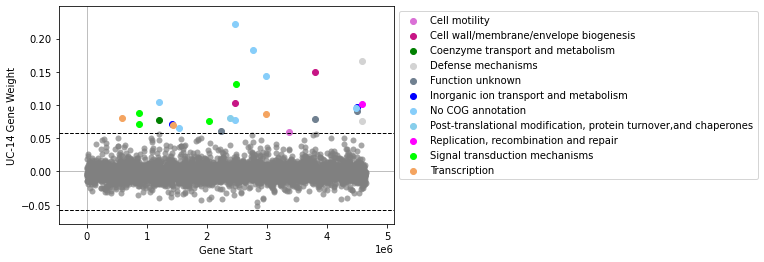

In [1521]:
plot_gene_weights(ica_data, iM_to_annotate, adjust_labels=False)

# Current Row

In [1522]:
ica_data.imodulon_table.loc[iM_to_annotate]

exp_var                                      0.005819
imodulon_size                                      27
enrichment_category                           Unknown
system_category                               Unknown
functional_category                           Unknown
function                                      Unknown
regulator                                         NaN
n_regs                                            NaN
pvalue                                            NaN
qvalue                                            NaN
f1score                                           NaN
precision                                         NaN
recall                                            NaN
TP                                                NaN
regulon_size                                      NaN
confidence                                          1
note                                              NaN
trn_enrich_max_regs                               NaN
trn_enrich_evidence         

# Show Genes

In [1523]:
imod_genes = ica_data.view_imodulon(iM_to_annotate)
imod_genes['length'] = imod_genes['end'] - imod_genes['start']
imod_genes.sort_values(by='gene_weight', ascending=False)

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator,length
b2352,0.221114,yfdI,NaN,2469131,2470462,+,CPS-53 (KpLE1) prophage%3B serotype specific g...,No COG annotation,P76507,NaN,1331
b2642,0.182431,yfjW,NaN,2773318,2775021,+,CP4-57 prophage%3B uncharacterized protein YfjW,No COG annotation,P52138,ppGpp,1703
b4345,0.166748,mcrC,NaN,4576912,4577958,-,5-methylcytosine-specific restriction enzyme s...,Defense mechanisms,P15006,NaN,1046
b3622,0.149647,waaL,NaN,3796948,3798207,+,O-antigen ligase,Cell wall/membrane/envelope biogenesis,P27243,"RpoD,RpoH,RpoE",1259
b2848,0.144306,yqeJ,NaN,2989304,2989786,+,protein YqeJ,No COG annotation,Q46943,Nac,482
b2370,0.131058,evgS,NaN,2484374,2487967,+,sensory histidine kinase EvgS,Signal transduction mechanisms,P30855,"RpoD,RpoS,ppGpp,EvgA,H-NS",3593
b1138,0.104296,ymfE,NaN,1197533,1198237,-,e14 prophage%3B uncharacterized protein YmfE,No COG annotation,P75968,NaN,704
b2351,0.102960,yfdH,NaN,2468214,2469134,+,CPS-53 (KpLE1) prophage%3B bactoprenol glucosy...,Cell wall/membrane/envelope biogenesis,P77293,NaN,920
b4346,0.101618,mcrB,NaN,4577958,4579337,-,5-methylcytosine-specific restriction enzyme s...,"Replication, recombination and repair",P15005,Nac,1379
b4279,0.096708,yjhB,NaN,4504058,4505275,+,putative sialic acid transporter,Inorganic ion transport and metabolism,P39352,"RpoH,NanR,NanR,RpoH",1217


# Regulator Enrichment

## Compute TRN Enrichment

In [1460]:
trn_enrichment = ica_data.compute_trn_enrichment(iM_to_annotate, max_regs=2, evidence=[1, 2],
                                                 force=True, method='and')
trn_enrichment

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs


# Update Regulator Row

In [1025]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = None

In [772]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = trn_enrichment.loc[
    6,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
]

In [773]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    [
        'trn_enrich_max_regs',
        'trn_enrich_evidence',
        'trn_enrich_method'
    ]
] = [
    3,
    '[0, 1, 2]',
    'and'
]

## Compute Regulator Enrichment

If the gene list suggests >3 regulators involved simultaneously

In [160]:
iM_to_annotate

'ZraR'

In [1002]:
specific_regulon = 'RpoS,ppGpp,IHF,H-NS'.replace(',', '+')
specific_enrichment = ica_data.compute_regulon_enrichment(iM_to_annotate, specific_regulon, evidence=[0, 1, 2])
specific_enrichment

pvalue           1.799558e-08
precision        7.500000e-01
recall           3.750000e-01
f1score          5.000000e-01
TP               3.000000e+00
regulon_size     8.000000e+00
imodulon_size    4.000000e+00
n_regs           4.000000e+00
Name: RpoS+ppGpp+IHF+H-NS, dtype: float64

### Update Regulator Row

In [1003]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['pvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = specific_enrichment[
    ['pvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
]
ica_data.imodulon_table.loc[iM_to_annotate, 'regulator'] = specific_regulon

In [1004]:
ica_data.imodulon_table.loc[iM_to_annotate, 'compute_regulon_evidence'] = '[0, 1, 2]'

# Plot iModulon Activities

<AxesSubplot:ylabel='UC-14 iModulon\nActivity'>

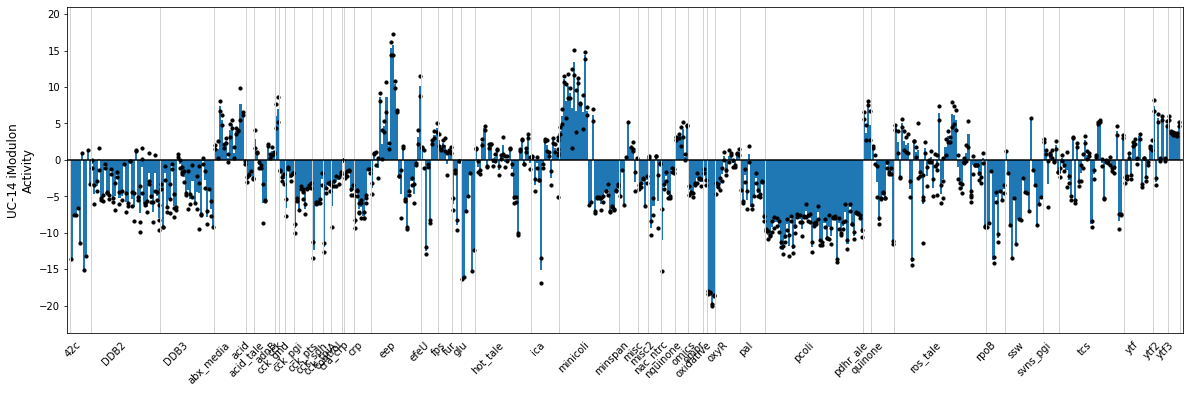

In [1520]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, ax=ax)

## Specific Project

<AxesSubplot:ylabel='UC-7 iModulon\nActivity'>

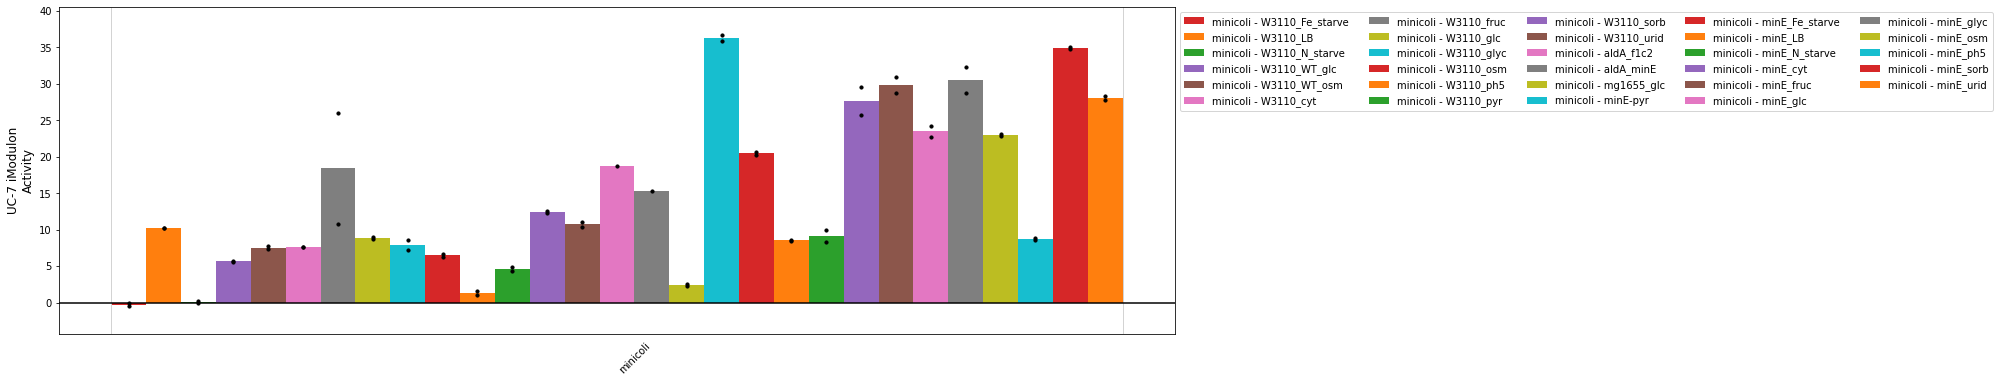

In [1421]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, projects='minicoli', ax=ax)

## Project Metadata

In [1422]:
ica_data.sample_table[ica_data.sample_table['project'].isin(['minicoli'])].sort_values(by='condition')[[
    'sample_id', 'Strain', 'Base Media', 'Strain Description',
       'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor',
       'Trace Element Mixture', 'Supplement', 'Temperature (C)', 'pH'
]]

,sample_id,Strain,Base Media,Strain Description,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH
minicoli_042,minicoli__W3110_Fe_starve__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_043,minicoli__W3110_Fe_starve__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_044,minicoli__W3110_LB__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_045,minicoli__W3110_LB__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_047,minicoli__W3110_N_starve__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_046,minicoli__W3110_N_starve__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_059,minicoli__W3110_WT_glc__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_058,minicoli__W3110_WT_glc__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_061,minicoli__W3110_WT_osm__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_060,minicoli__W3110_WT_osm__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Metadata Boxplot

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


<AxesSubplot:xlabel='Single Reads-1'>

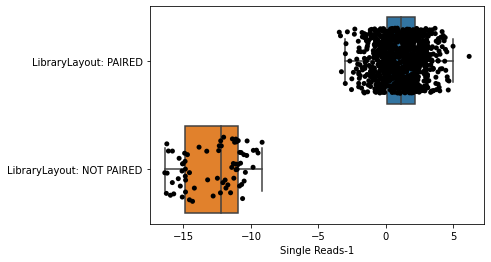

In [335]:
metadata_boxplot(ica_data, iM_to_annotate, use_cols=['LibraryLayout'])

# Category/Function/Confidence

In [883]:
ica_data.imodulon_table['functional_category'].value_counts()

Unknown                     84
Carbon Metabolism           46
Energy Metabolism           23
Amino Acid Metabolism       19
Metal Homeostasis           16
Extracellular Structures    13
Envelope Stress             12
Nitrogen Metabolism         10
Cofactor Metabolism          7
Redox Stress                 5
Temperature Shock            4
Nucleotide Metabolism        4
Quorum Sensing               4
Genome Reduction             3
Phosphate Metabolism         2
Toxin/Antitoxin              2
DNA Damage                   2
Resistance                   1
Strain Difference            1
Translation                  1
Prophage                     1
Global Stress                1
Acid Stress                  1
Phage Shock                  1
Name: functional_category, dtype: int64

In [1506]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    [
        'enrichment_category',
        'system_category',
        'functional_category',
        'function',
        'confidence',
        'note'
    ]
] = [
    'Biological',
    'Stress Responses',
    'Extracellular Structures',
    'Cellulose biosynthesis; biofilm formation; membrane/periplasmic proteins',
    2,
    None
]

# PRECISE and PRECISE 2.0 Comparison

## Load PRECISE

In [1062]:
precise1_path = '../data/precise/'
thresholds = pd.read_csv(os.path.join(precise1_path, 'M_thresholds.csv'),index_col=0)
thresholds = dict(zip(thresholds.index, thresholds['0']))
precise1 = IcaData(
    os.path.join(precise1_path, 'M.csv'),
    os.path.join(precise1_path, 'A.csv'),
    sample_table=os.path.join(precise1_path, 'sample_table.csv'),
    imodulon_table=os.path.join(precise1_path, 'iM_table.csv'),
    thresholds=thresholds
)

## Load PRECISE 2.0

In [1066]:
precise2 = load_json_model('../data/precise2/precise2.json.gz')

## Run Correlation Comparisons

In [1186]:
match_rows = []
for match in compare_ica(precise1.M, ica_data.M, method='pearson')[0]:
    match_rows.append({
        'dataset': 'PRECISE',
        'iM': match[0],
        'p1k_im': match[1],
        'method': 'pearson',
        'corr': match[2]
    })
for match in compare_ica(precise1.M, ica_data.M, method='spearman')[0]:
    match_rows.append({
        'dataset': 'PRECISE',
        'iM': match[0],
        'p1k_im': match[1],
        'method': 'spearman',
        'corr': match[2]
    })
for match in compare_ica(precise2.M, ica_data.M, method='pearson')[0]:
    match_rows.append({
        'dataset': 'PRECISE 2.0',
        'iM': match[0],
        'p1k_im': match[1],
        'method': 'pearson',
        'corr': match[2]
    })
for match in compare_ica(precise2.M, ica_data.M, method='spearman')[0]:
    match_rows.append({
        'dataset': 'PRECISE 2.0',
        'iM': match[0],
        'p1k_im': match[1],
        'method': 'spearman',
        'corr': match[2]
    })
    
match_df = pd.DataFrame(match_rows)

In [1203]:
def p1name(row):
    if row['dataset'] == 'PRECISE':
        return precise1.imodulon_table.loc[row['iM'], 'name']
    else:
        return row['iM']
match_df['iM'] = match_df.apply(p1name, axis=1)

In [1250]:
for im, im_row in ica_data.imodulon_table.iterrows():
    im_match = match_df[match_df['p1k_im'] == im]
    if not im_match.empty:
        for dataset, dataset_match_df in im_match.groupby('dataset'):
            max_corr = np.argmax(dataset_match_df['corr'])
            max_corr_im = dataset_match_df.iloc[max_corr]['iM']
            max_corr_im_df = dataset_match_df[dataset_match_df['iM'] == max_corr_im]
            for _, max_corr_row in max_corr_im_df.iterrows():
                ica_data.imodulon_table.loc[im, max_corr_row['dataset']] = max_corr_row['iM']
                ica_data.imodulon_table.loc[im, f"{max_corr_row['dataset']}_{max_corr_row['method']}"] = max_corr_row['corr']

# Update IcaData Object and Tables

## Rename iModulon

In [1507]:
iM_to_annotate

'UC-13'

In [1529]:
ica_data.rename_imodulons({'UC-14': 'UC-5'})

In [1481]:
[n for i, n in enumerate(ica_data.imodulon_names) if isinstance(n, str) and 'Iron' in n]

['Iron Uptake']

## Save Tables

In [1531]:
ica_data.imodulon_table.to_csv('../data/precise1k/imodulon_table.csv')
ica_data.A.to_csv('../data/precise1k/A.csv')
ica_data.M.to_csv('../data/precise1k/M.csv')
save_to_json(ica_data, '../data/precise1k/precise1k', compress=True)